In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
path_to_csv = '/content/gdrive/My Drive/data.csv'
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
# Read the provided CSV file ‘data.csv’
df = pd.read_csv(path_to_csv)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [3]:
# Show the basic statistical description about the data.
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [5]:
# Check if the data has null values.
print('Are there any null values: ',df.isnull().values.any())
# Replace the null values with the mean
df.fillna(df.mean(),inplace=True)
print('Are there any null values after using fillna: ',df.isnull().values.any())

Are there any null values:  True
Are there any null values after using fillna:  False


In [6]:
# Select at least two columns and aggregate the data using: min, max, count, mean.
aggre = df.groupby('Duration').agg({'Calories':['mean','min','max','count']})
aggre

Calories                      
                 mean     min     max count
Duration                                   
15          87.350000    50.5   124.2     2
20         151.600000    50.3   229.4     9
25         244.200000   244.2   244.2     1
30         192.125000    86.2   319.2    16
45         279.096585   100.7   406.0    35
60         341.046465   215.2   486.0    79
75         325.400000   320.4   330.4     2
80         643.100000   643.1   643.1     1
90         541.800000   466.4   700.0     8
120        666.833333   500.0  1000.1     3
150        939.400000   816.0  1115.0     4
160        943.700000   853.0  1034.4     2
180        733.600000   600.1   800.4     3
210       1618.200000  1376.0  1860.4     2
270       1729.000000  1729.0  1729.0     1
300       1500.200000  1500.2  1500.2     1

In [7]:
# Filter the dataframe to select the rows with calories values between 500 and 1000
df[(df['Calories']>=500) & (df['Calories']<=1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [8]:
# Filter the dataframe to select the rows with calories values > 500 and pulse < 100
df[(df['Calories']>500) & (df['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [9]:
# Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df_modified = df[['Duration', 'Pulse', 'Calories']]
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [10]:
# Delete the “Maxpulse” column from the main df dataframe
df = df.drop('Maxpulse', axis=1)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [11]:
# Convert the datatype of Calories column to int datatype
df['Calories'] = df['Calories'].astype('int64')
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<Axes: xlabel='Duration', ylabel='Calories'>

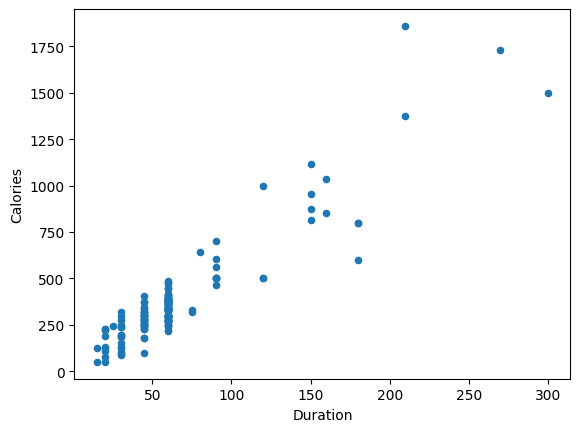

In [12]:
# Using pandas create a scatter plot for the two columns (Duration and Calories)
df.plot.scatter(x='Duration', y='Calories')

Titanic Dataset

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('/content/gdrive/My Drive/Dataset/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/Dataset/test.csv')
titanic = pd.concat([train_df, test_df])
# Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass
titanic_copy = titanic.copy()
titanic_copy['Survived'] = titanic_copy['Survived'].astype('category').cat.codes
titanic_copy['Sex'] = titanic_copy['Sex'].astype('category').cat.codes
titanic_copy['Embarked'] = titanic_copy['Embarked'].astype('category').cat.codes
corr = titanic_copy['Survived'].corr(titanic_copy['Sex'])
corr

-0.2269178484034977

In [14]:
titanic_copy.corr()['Survived']

PassengerId   -0.687207
Survived       1.000000
Pclass        -0.126769
Sex           -0.226918
Age           -0.049620
SibSp          0.012470
Parch          0.028196
Fare           0.081545
Embarked      -0.013303
Name: Survived, dtype: float64

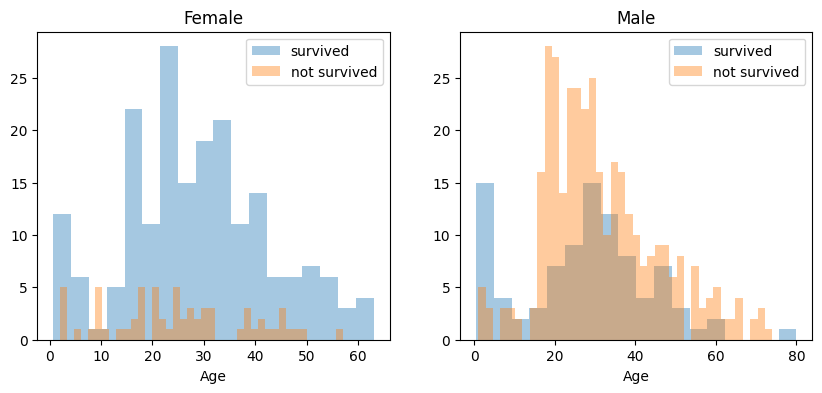

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [16]:
# Do you think we should keep this feature?
''' In my opinion, we should keep this feature.
As we can see in the above correlation plot, age has good impact on the survival factor more in the male category 
while compared to in the female category. The correlation value of negative 0.22 is considered as a weak relation but 
when we take a look at the correlation matrix of the dataframe, Sex is the column that has the second highest impact(absolute value) on the target column.'''

' In my opinion, we should keep this feature.\nAs we can see in the above correlation plot, age has good impact on the survival factor more in the male category \nwhile compared to in the female category. The correlation value of negative 0.22 is considered as a weak relation but \nwhen we take a look at the correlation matrix of the dataframe, Sex is the column that has the second highest impact(absolute value) on the target column.'

<Axes: >

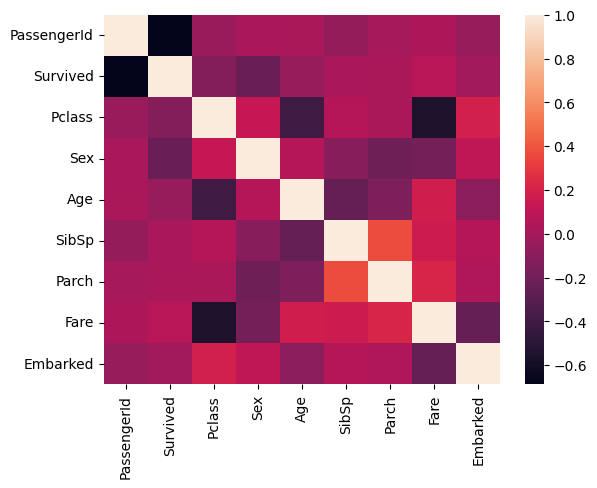

In [17]:
# Do at least two visualizations to describe or show correlations
corr_data = titanic_copy.corr()
sns.heatmap(corr_data)

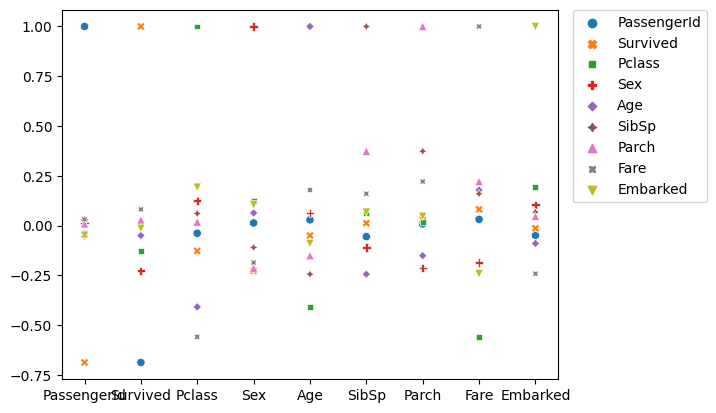

In [18]:
sns.scatterplot(corr_data)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

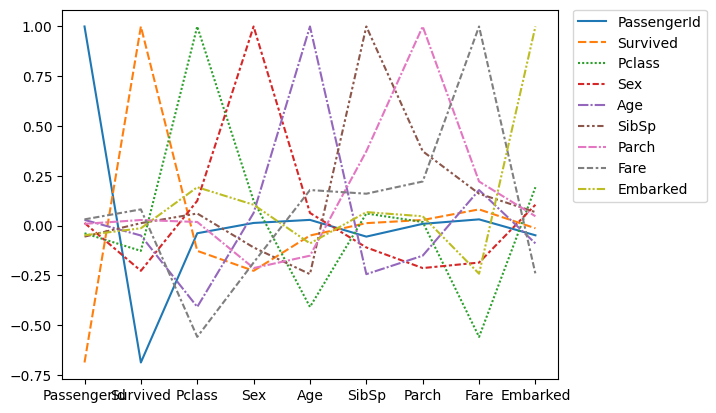

In [19]:
sns.lineplot(corr_data)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

In [20]:
# Implement Naïve Bayes method using scikit-learn library and report the accuracy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
titanic_copy = titanic_copy.dropna()
df = titanic_copy.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
X = df.drop('Survived', axis=1)
y = df['Survived']
# Use train_test_split to create training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.75      0.16      0.26        19
           0       0.44      0.44      0.44         9
           1       0.55      0.85      0.67        27

    accuracy                           0.55        55
   macro avg       0.58      0.48      0.46        55
weighted avg       0.60      0.55      0.49        55

[[ 3  2 14]
 [ 0  4  5]
 [ 1  3 23]]
accuracy is 0.5454545454545454


Glass dataset

In [27]:
# Implement Naïve Bayes method using scikit-learn library.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
glass = pd.read_csv('/content/gdrive/My Drive/Dataset/glass.csv')
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values
# Use train_test_split to create training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the model on testing part using score and clasification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('accuracy is',accuracy_score(y_pred,y_test),'\n\n')
print(classification_report(y_test, y_pred))

accuracy is 0.37209302325581395 


              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43



In [28]:
# Implement linear SVM method using scikit library
from sklearn.svm import LinearSVC

classifier_1 = LinearSVC()
classifier_1.fit(X_train, y_train)

y_pred_1 = classifier_1.predict(X_test)
# Evaluate the model on testing part using score and clasification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('accuracy is',accuracy_score(y_pred_1,y_test),'\n\n')
print(classification_report(y_test, y_pred_1))

accuracy is 0.5581395348837209 


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.50      0.95      0.65        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.56        43
   macro avg       0.23      0.32      0.26        43
weighted avg       0.34      0.56      0.42        43



<Axes: >

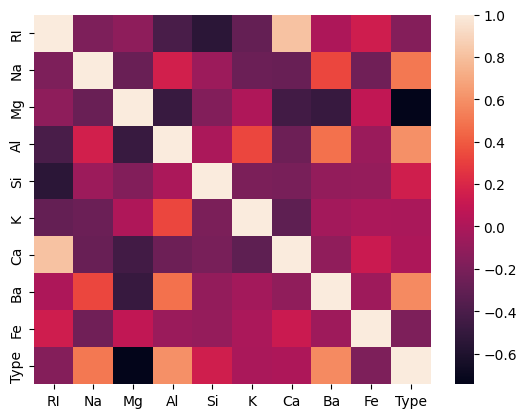

In [23]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset. 
correlation_data = glass.corr()
sns.heatmap(correlation_data)

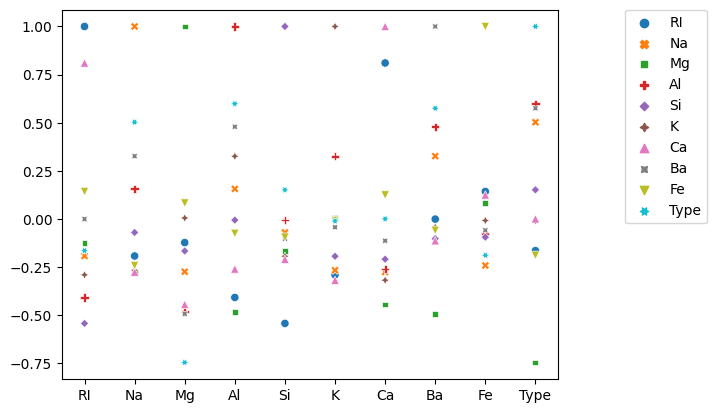

In [25]:
sns.scatterplot(correlation_data)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

In [ ]:
# Which algorithm you got better accuracy? Can you justify why?
''' Linear SVM has performed and got better accuracy when compared to Naive Bayes. 
This is becuase it is a high dimensional data.'''